# Atividade 8 - Quadrados Mínimos e Ajuste de Curvas

Nome: João Pedro Bizzi Velho
RA: 218711

Nas atividades anteriores eu estava utilizando o Google Colaboratory para programar em python e fazer o relatório ao mesmo tempo. Porém, como temos o arquivo .mat individual neste relatório decidi usar o Octave para resolve-lo e escrever os resultados obtidos pelo Google Colaboratory, então printei os gráficos do Octave e colei os códigos utilizados nas células do Colaboratory para diferenciar do texto.

## Questão 1



Utilizando o comando Stem para plotar a distribuição temos o seguinte:
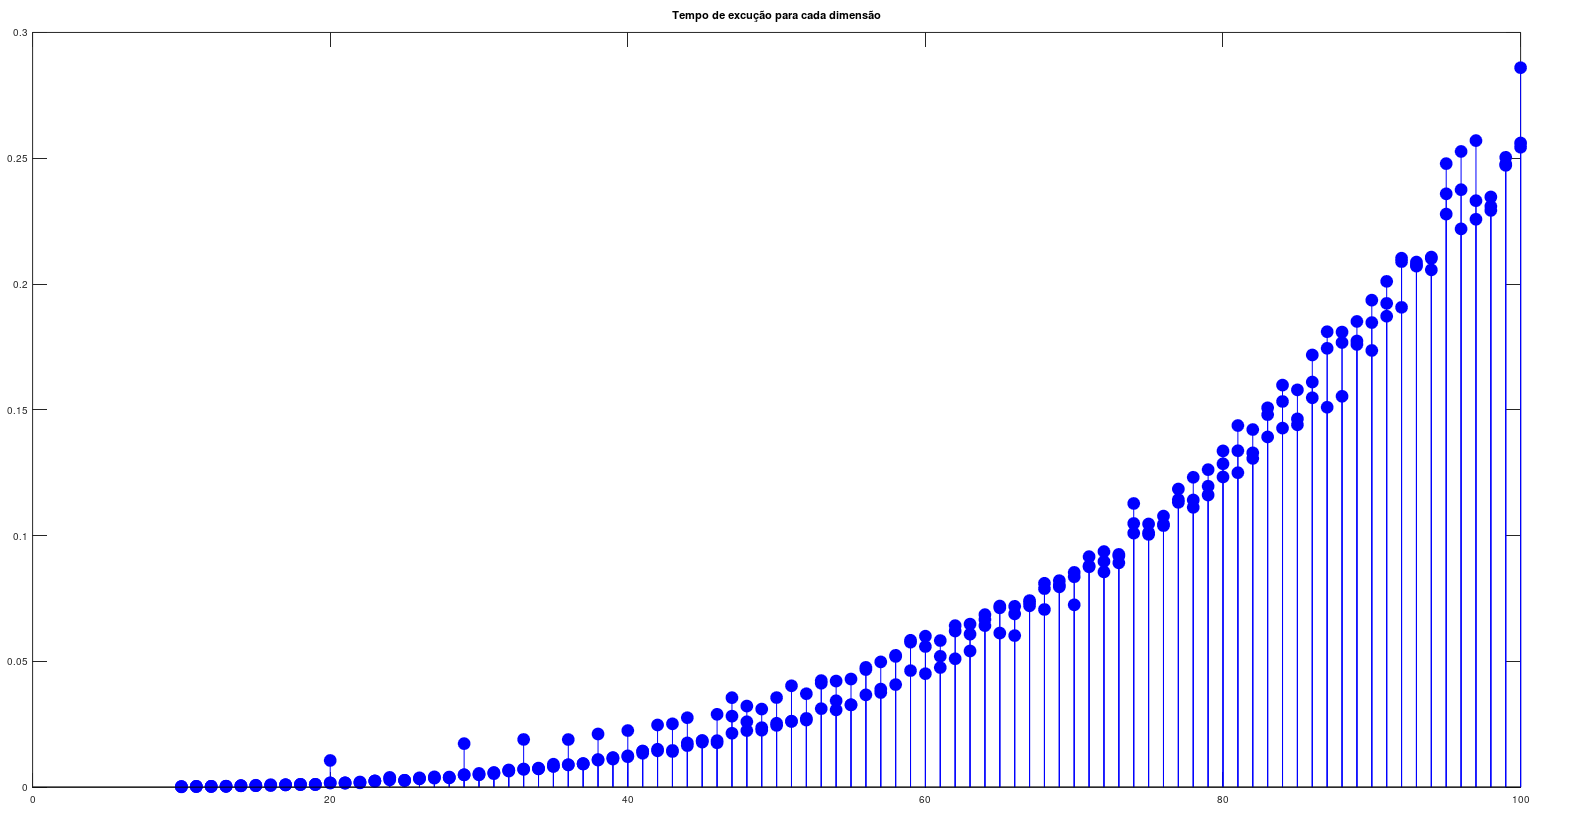



  Utilizando a função *polyfit* do octave, temos as aproximações para as dimensões 500 e 1000 dadas por:

$t(500) = 72,194$ s

$t(1000) = 993,88$ s
  
  No entanto, se utilizarmos o código que foi disponibilizado pelos professores, realizando a aproximação realizada pelo método dos Quadrados Mínimos, temos o seguinte:

$t(500) = 68,596$ s

$t(1000) = 919,330$ s

Notamos portanto que a aproximação feita pelo método "HardCoded" é muito próximo do valor obtido usando a função polyfit.

In [ ]:
# Import
distribuicao = load("data");

# Gráfico
#h = stem(distribuicao.dim,distribuicao.tempo, '-b',"markerfacecolor", [0 0 1]);
#title("Tempo de excução para cada dimensão");

# Variáveis
x = distribuicao.dim;
y = distribuicao.tempo;

p = polyfit(x,y,4);
printf("Usando o polyfit do Octave obtemos\n");

polyval(p,500)
polyval(p,1000)

printf("Usando o método apresentado em aula:\n");

function [a] = AjustaCurva(x,y,g)
% x : uma matriz p x k, onde x(:,i) representa x_i
% y : um vetor 1 x k, onde y(i) representa y_i
% g: uma função vetorizada onde g:R^p -> R^n, g:R^(k x p) -> R^(p x n)

G = g(x');
A = G'*G;

b = G'*y';
a = A\b;
endfunction

g = @(x) [ones(length(x),1)  x x.^2 x.^3 x.^4];

[a] = AjustaCurva(x,y,g);
phi = @(x) g(x)*a;

plot(x,y,'ob;Pontos dados;');
title("Tempo de simulação em função da dimensão");
xlabel('Dimensão');
ylabel('Tempo');
legend("Pontos dados",'Aproximação');
hold on;
fplot(phi,[0,10ss00],'r;Aproximação;');
hold off;

phi(500)
phi(1000)



O gráfico obtido pelo plot acima é:
Onde os pontos azuis representam os pontos dados e a curva em vermelho representa a aproximação realizada (não consegui colocar legenda de dados no Octave).

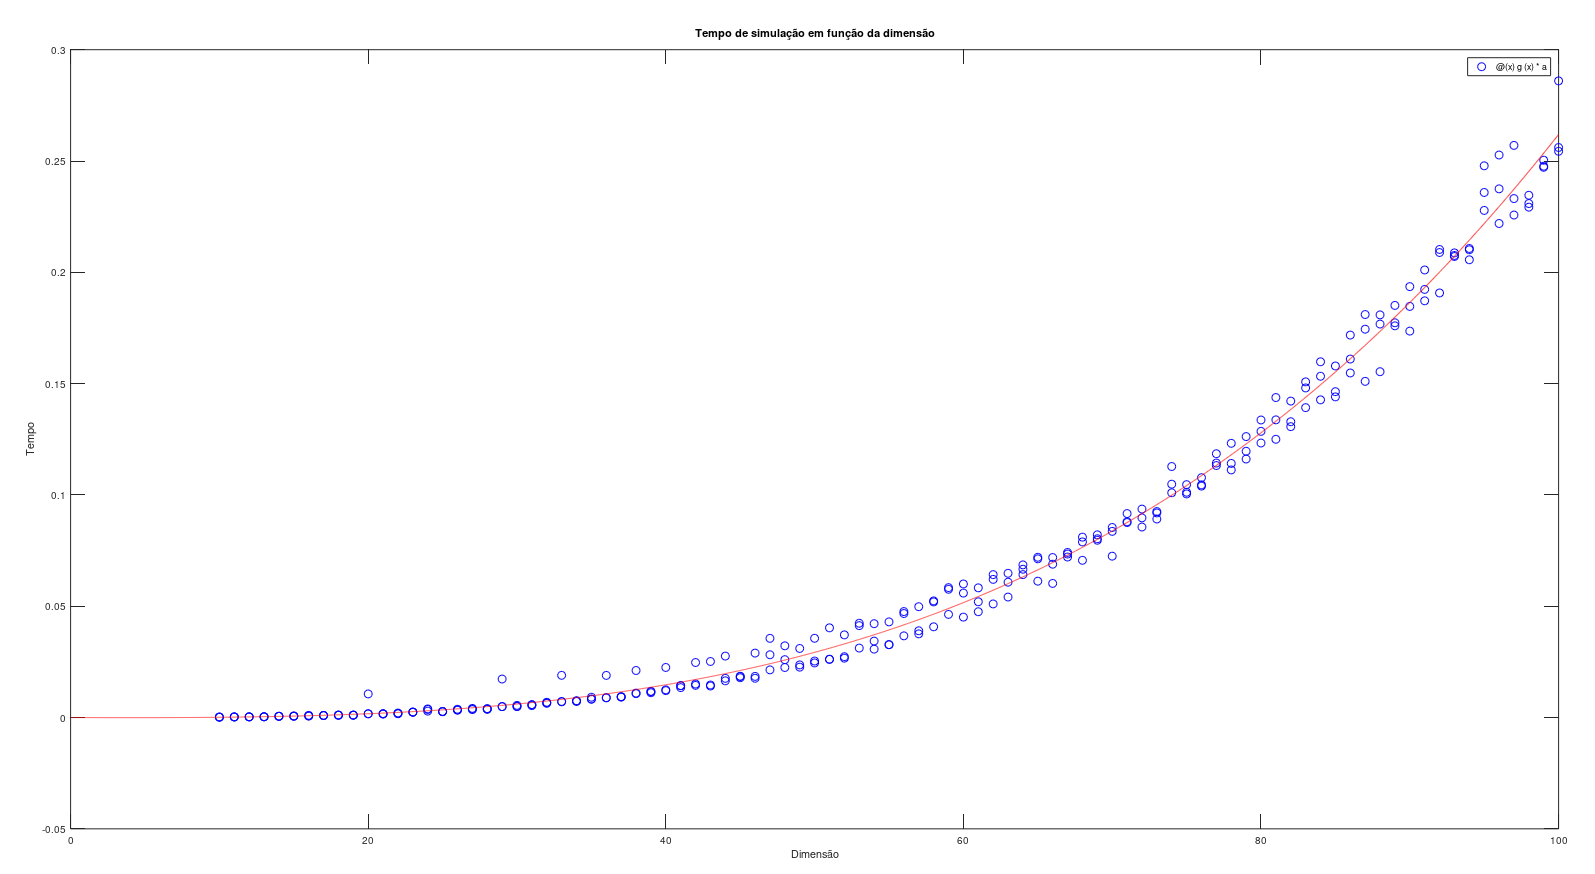

Notamos, portanto, que a curva aproximada obtida, cobre muito bem os pontos dados, confirmando que o método dos quadrados mínimos é ideal para este tipo de problema. Se extendermos o plot para valores acima dos pontos dados temos o seguinte:

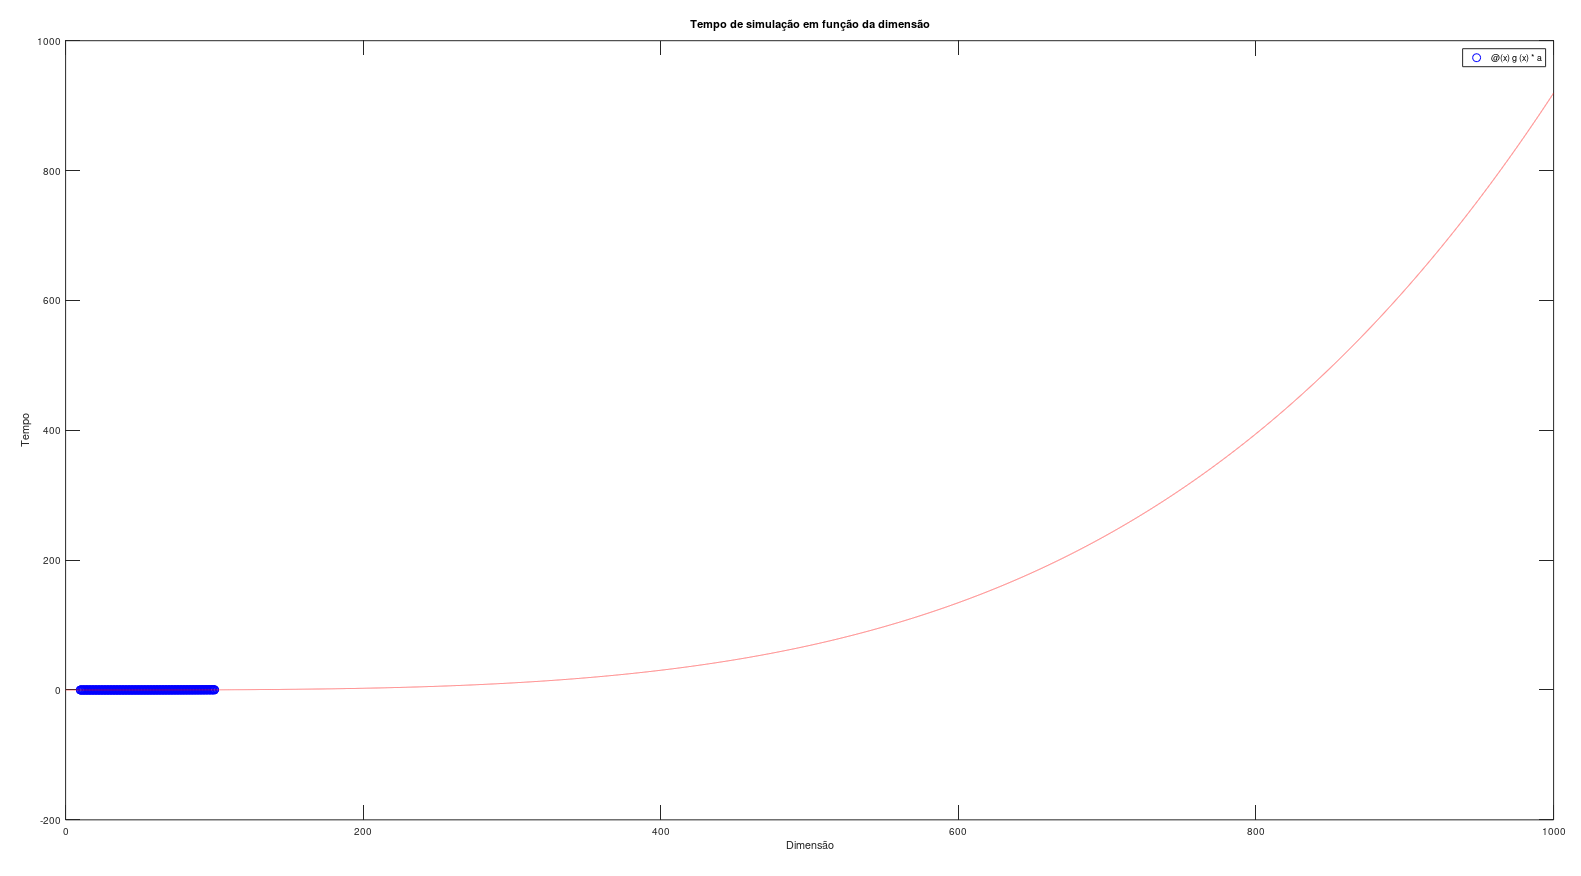

## Questão 2

Nesta questão utilizei ao invés dos dias, as semanas, logo, a contagem é feita em semanas apartir do dia inicial para facilitar, considerando a primeira semana, a do dia 2 como a semana número 1 e não a número 0. Plotando os valores dados:

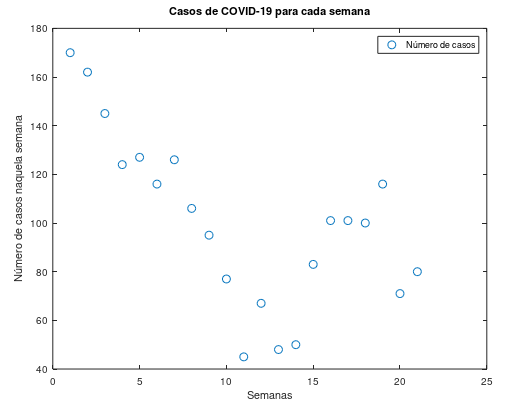

O código utilizado no Octave foi o seguinte:

In [ ]:
  #array dos dias
  dias = linspace(2,170,25);
  #array com os números
  casos = [170,162,145,124,127,116,126,106,95,77,45,67,48,50,83,101,101,100,116,71,80];
  
  plot([1:21],casos,'.o;Número de casos;');
  xlabel("Semanas");
  ylabel("Número de casos naquela semana");
  title("Casos de COVID-19 para cada semana");

  x = casos(1:21);
  N = length(x);  
  p = polyfit([1:N],casos,20);
  printf("Previsão com o polyfit\n");
  polyval(p,22)
  polyval(p,23)
  polyval(p,24)
  polyval(p,25)
  
  N = length(x);
  # foi pedido para  k = 4
  g0 = ones(N-4,1);
  g1 = x(4:N-1)';
  g2 = x(3:N-2)';
  g3 = x(2:N-3)';
  g4 = x(1:N-4)';
  G = [g0, g1, g2, g3,g4];
  y = x(5:N)';
  
  
  A = G'*G;
  b = G'*y;
  
  alpha = A\b;
  plot([1:N],x,'o;Pontos Dados;');
  title("Aproximação realizada");
  xlabel("Semanas");
  ylabel("Número de casos naquela semana");
  hold on;
  plot([5:N],G*alpha,'-r;Curva aproximada;');
  hold off;
  xt = x;
  a = [1,x(N:-1:N-4)];
  
  xt(N+1) = dot([1,x(N:-1:N-3)],alpha);
  xt(N+1)
  xt(N+2) = dot([1,xt(N + 1:-1:N - 2)],alpha);
  xt(N+2)
  xt(N+3) = dot([1,xt(N + 2:-1:N - 1)],alpha);
  xt(N+3)
  xt(N+4) = dot([1,xt(N + 3:-1:N )],alpha);
  xt(N+4)
  
  plot([1:N],x,'ob;Pontos Dados;');
  title("Pontos dados e Pontos aproximados");
  xlabel("Semanas");
  ylabel("Número de casos naquela semana");
  hold on;
  plot([N+1:N+4],xt(N+1:N+4),'*r;Pontos Aproximados;');
  hold off;

### item (a)- coeficientes $\alpha$
Seguindo o código dado em aula para um modelo auto-regressivo linear, temos que os valores pedidos são os contidos na matriz alpha. Logo temos:

> $\alpha_0 = 27.556$

> $\alpha_1 = 0.59273$

> $\alpha_2 = 0.21653$

> $\alpha_3 = 0.13406$

> $\alpha_4 = -0.26193$

Além disto, se plotarmos a aproximação realizada obtemos o seguinte:

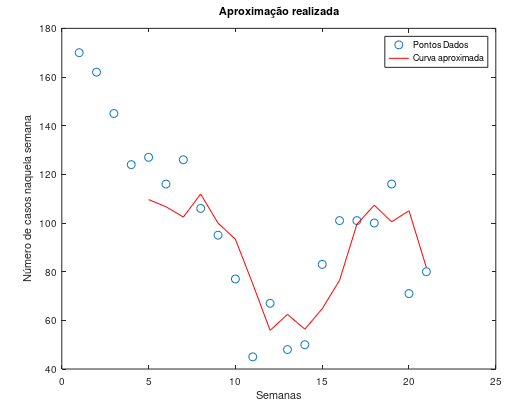

### item (b) - estimativa para as próximas semanas

Novamente utilizando o código dado em aula, utilizando o comando dot para multiplicar a matriz alpha com os últimos 4 valores da matriz $xt$ temos que o número de casos estimados para as próximas 4 semanas é dado por:

$x_{22} = 79,706$

$x_{23} = 71,257$

$x_{24} = 79,179$

$x_{25} = 79,648$

Tentei usar a função polyfit também, mas os valores obtidos são astronômicos, logo, o resultado não é válido. Já os resultados obtidos com a aproximação realizada são válidos, já que se mantêm na curva dos pontos inicias.

Por fim, plotando os pontos obtidos em conjunto com os pontos dados:

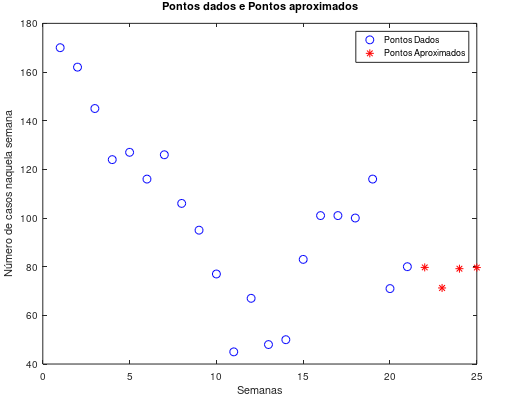

Notamos que os pontos obtidos pela aproximação seguem a tendência de redução dos últimos pontos, como os últimos 4 pontos dados apresentam um decaimento, o primeiro ponto aproximado é menor também, o mesmo é válido para os outros pontos aproximados que passam a utilizar os novos valores e portanto seguem na mesma região. Conclui-se portanto que a aproximação é válida.